In [16]:
import pandas as pd
filename = 'winequality-red.csv'
df = pd.read_csv(filename)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [18]:
# 檢查缺失值 >> 沒有缺失值
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

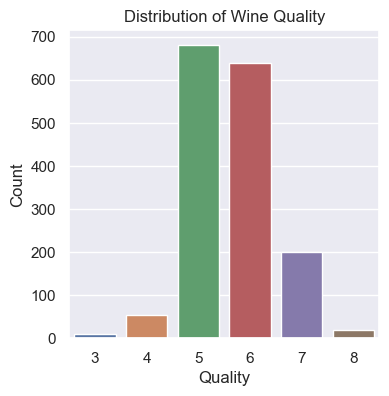

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
# 使用 seaborn 繪製計數圖
sns.countplot(x='quality', data=df)

# 添加標籤
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')

# 顯示圖表
plt.show()

### ======================資料預處理========================

先將 quality 欄位暫時從數據集中移除，以便於對其他特徵進行平衡分析及異常值處理。
異常值處理：對數據集中的其他特徵進行異常值檢測並進行處理。

In [20]:
import numpy as np

# 保存 quality 欄位並從原數據集中移除
quality_series = df['quality']
df = df.drop('quality', axis=1)


In [21]:
# 使用四分位距（IQR）方法來識別潛在的異常值
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# 計算每個特徵中潛在異常值的數量
potential_outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

potential_outliers


fixed acidity            49
volatile acidity         19
citric acid               1
residual sugar          155
chlorides               112
free sulfur dioxide      30
total sulfur dioxide     55
density                  45
pH                       35
sulphates                59
alcohol                  13
dtype: int64

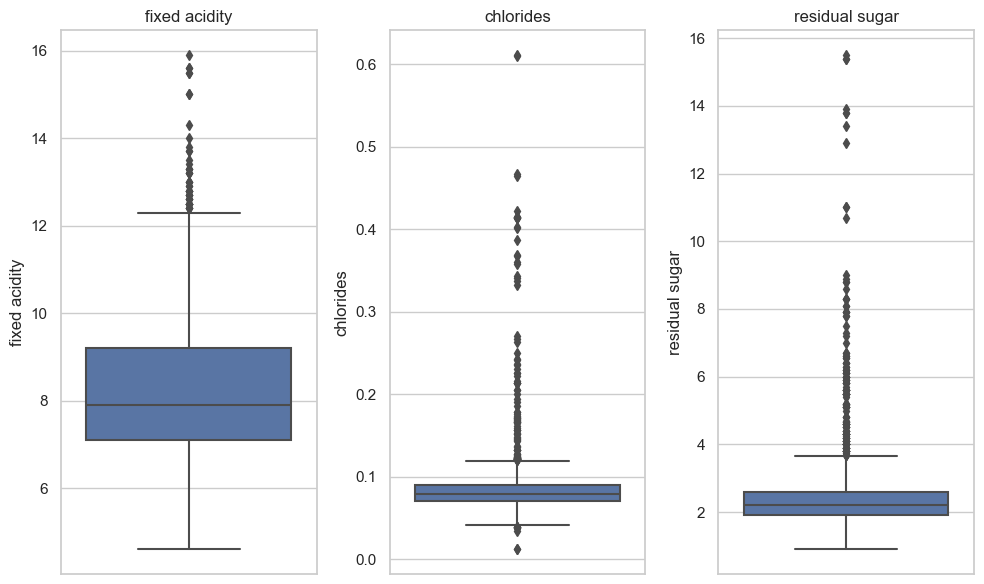

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# 設置seaborn的風格
sns.set(style="whitegrid")

# 選擇具有潛在異常值的特徵進行繪圖
features_to_plot = ['fixed acidity', 'chlorides', 'residual sugar']

# 繪製箱形圖
plt.figure(figsize=(10, 6))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[feature])
    plt.title(feature)

plt.tight_layout()
plt.show()


這些統計數據顯示，異常值的替換可能已經幫助減少了數據中的極端值，使得數據的分布更為集中。

In [23]:
# 計算每個特徵的中位數
medians = df.median()

# 使用IQR識別異常值的標準來替換它們
for feature in df.columns[:-2]:  # 排除最後兩個二元和質量評分特徵
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 將異常值替換為中位數
    df[feature] = df[feature].apply(lambda x: medians[feature] if x < lower_bound or x > upper_bound else x)

# 檢查替換後的結果，展示一些基本的統計數據來確認替換是否成功
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.154534,0.520547,0.270513,2.181801,0.078773,15.163852,42.825516,0.996735,3.308799,0.658149,10.422983
std,1.490883,0.165588,0.193945,0.426845,0.014335,9.140986,26.757870,0.001643,0.138951,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.041000,1.000000,6.000000,0.992350,2.930000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995680,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.000000,0.630000,0.420000,2.400000,0.086000,21.000000,58.000000,0.997800,3.400000,0.730000,11.100000
max,12.300000,1.010000,0.790000,3.650000,0.119000,42.000000,122.000000,1.001000,3.680000,2.000000,14.900000


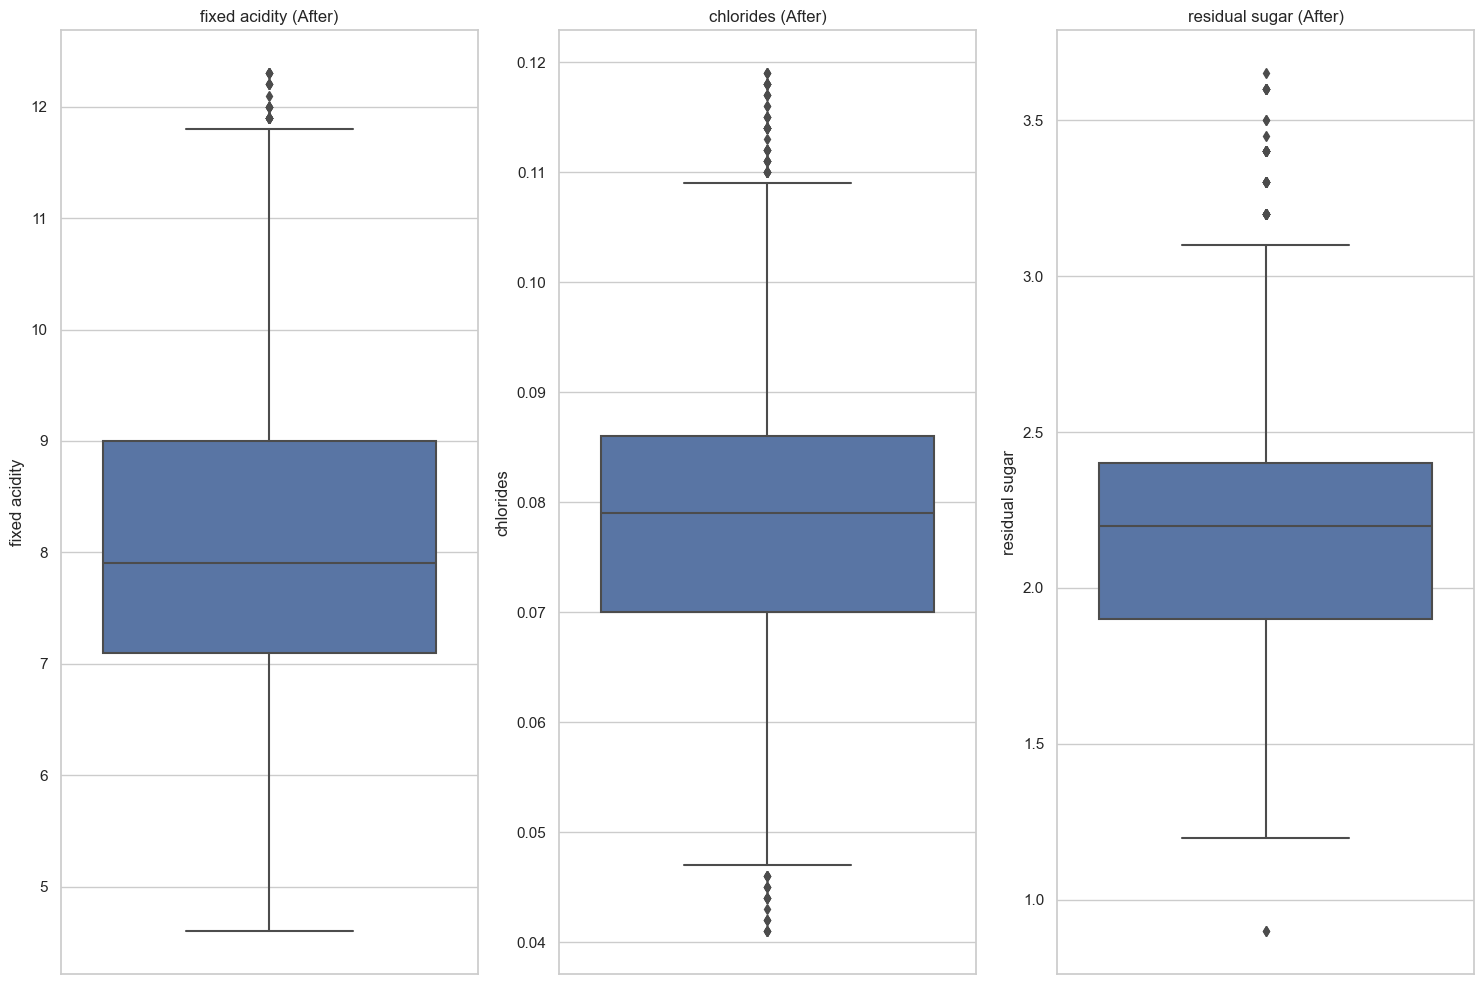

In [24]:
# 繪製處理異常值後的箱形圖
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[feature])
    plt.title(feature + ' (After)')

plt.tight_layout()
plt.show()


In [25]:
# 異常值處理後，將 quality 欄位加回數據集
df['quality'] = quality_series

# 從這裡開始，您可以繼續進行需要 `quality` 欄位的分析工作
# 例如，轉化 `quality` 為二元類別
df['quality'] = df['quality'].apply(lambda x: 1 if x > 6.5 else 0)

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [26]:
# 移除 `quality` 欄位並保存
X = df.drop('quality', axis=1)
y = df['quality']

特徵間的關係
直觀地展示特徵間的相互關係

高相關性：
fixed acidity 與 citric acid 有較高的正相關（約0.61），這可能意味著隨著固定酸度的增加，檸檬酸含量也增加。
free sulfur dioxide 和 total sulfur dioxide 也有很強的正相關性（約0.60），這指出自由二氧化硫和總二氧化硫的含量通常是一致的。
density 和 fixed acidity 之間的正相關（約0.56）可能表示酸度較高的酒通常有更高的密度。

中等相關性：
fixed acidity 與 pH 有中等程度的負相關（約 -0.60），這是合理的，因為酸度越高，pH 值通常會越低（更酸）。
alcohol 與 density 有一定程度的負相關（約 -0.46），意味著酒精濃度較高的酒可能密度較低。

質量相關性：
與 quality 相關性較高的特徵包括 alcohol（正相關，約0.41），顯示酒精度較高的葡萄酒可能有更好的品質。
而 volatile acidity 與 quality 有中等程度的負相關（約 -0.28），這可能意味著揮發酸含量越高，葡萄酒的品質可能越差。

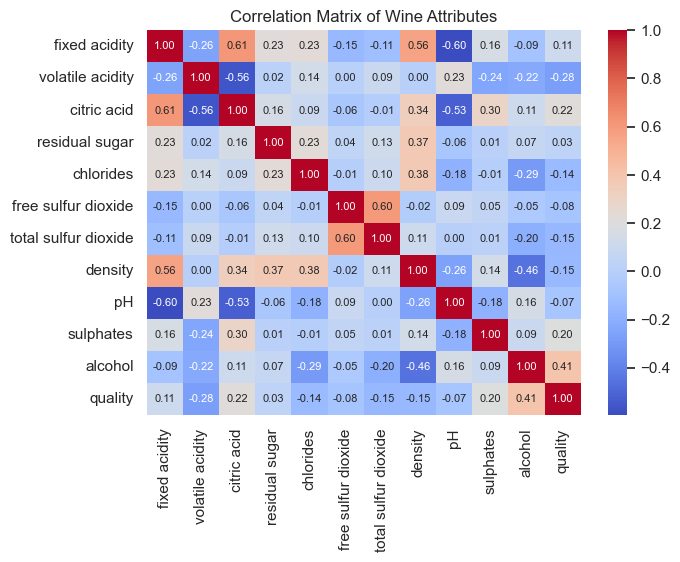

In [27]:

import matplotlib.pyplot as plt
import seaborn as sns

# 首先我們需要重新計算相關矩陣
corr_matrix = df.corr()
# 設置圖表尺寸
plt.figure(figsize=(7, 5))  # 可以根據需要調整這裡的尺寸

# 繪製熱力圖
sns.heatmap(corr_matrix, annot=True, fmt=".2f", annot_kws={"size":8}, cmap='coolwarm')
plt.title('Correlation Matrix of Wine Attributes')
plt.show()

多變量分析是一種統計方法，它可以用來分析多個變量之間的關係。在葡萄酒品質數據集的情境中，這可能包括了解哪些化學特徵對於預測葡萄酒品質最有影響，或者哪些特徵之間存在潛在的相互作用。

[0.26789614 0.18059673 0.13947327 0.09690117 0.07645115 0.06275035
 0.05803339 0.04122359 0.03493132 0.02350636 0.01823653]


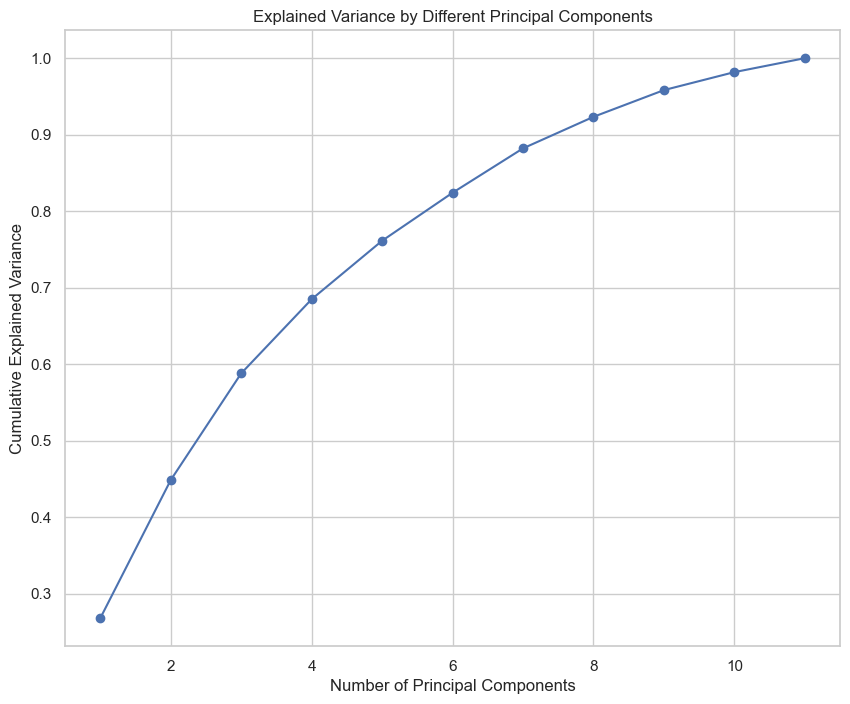

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 由於PCA受數據尺度的影響，所以需要先對特徵進行標準化
# 移除非數值型列，這裡假設 df 是除去了 'quality' 的 DataFrame
features = df.drop(columns=['quality'], axis=1)

# 標準化特徵
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 應用PCA
pca = PCA()
# 對標準化的特徵進行PCA變換
components = pca.fit_transform(features_scaled)

# 獲取主成分的解釋變異量
explained_variance = pca.explained_variance_ratio_

# 打印解釋變異量
print(explained_variance)

# 將主成分轉換為DataFrame
components_df = pd.DataFrame(data=components, columns=[f'PC{i+1}' for i in range(len(explained_variance))])

# 可視化累計解釋變異量以決定需要多少主成分
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o')
plt.title('Explained Variance by Different Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

累計解釋變異量圖，它顯示了每個主成分（PC）對數據集變異量的貢獻。這是用來決定在主成分分析（PCA）中應保留多少成分的重要工具。

在圖表中，橫軸表示主成分的數量，縱軸表示這些成分累計解釋的數據集變異量的百分比。每一點顯示了包含到該點為止的所有主成分所能解釋的變異量。

第一主成分（PC1）本身解釋了數據變異量的約26.79%。
加上第二主成分（PC2），這兩個成分共解釋了大約44.85%的變異量（26.79% + 18.05%）。
隨著更多的主成分被加入，解釋的變異量逐漸增加。通常，我們會尋找累計解釋變異量達到某個比例（例如80%或90%）的點，以此為依據選擇合適的成分數量。
從您的圖表來看，大概在第6或第7個主成分時，累計解釋變異量已經超過了80%。這意味著您可以只用前6到7個主成分來捕捉大部分數據的信息，這在很多情況下足夠進行後續的分析或建模工作，同時也大幅度減少了數據的維度，這有助於避免維度災難並減少過擬合的風險。

最後，需要注意的是，雖然選擇主成分時通常會考慮累計解釋變異量，但也需要考慮到您的特定分析或預測任務中，哪些成分是有意義的。有時候，即便是貢獻較小的成分也可能包含對於特定問題重要的信息。

In [29]:
# 假設已經進行了PCA，並且PCA結果存儲在components_df中
# 選擇壓縮後保留的主成分數量
n_components_to_keep = 5

# 保留前n個主成分作為特徵
compressed_features = components_df.iloc[:, :n_components_to_keep]

# 現在compressed_features可以被用於機器學習建模或進一步分析

print(compressed_features)

           PC1       PC2       PC3       PC4       PC5
0    -1.664645 -1.144094 -1.392748 -0.401695  0.506601
1    -0.433718 -2.792411 -0.065575  0.404187  0.461331
2    -0.494343 -1.734520 -0.750523 -0.011411  0.422842
3     2.574479  0.373676  0.640318 -1.205996 -1.412864
4    -1.664645 -1.144094 -1.392748 -0.401695  0.506601
...        ...       ...       ...       ...       ...
1594 -2.227066 -0.972817  0.876141  0.001629 -0.042107
1595 -2.599537 -0.143809  2.451041  0.514624  0.633384
1596 -1.543374 -0.088902  1.309609  0.572651  0.666694
1597 -2.561791 -0.829031  1.186823 -0.015192  0.837658
1598 -0.055836  0.720510  1.373627  2.882332 -0.276793

[1599 rows x 5 columns]


In [31]:
from sklearn.decomposition import PCA

# 保留原始數據集的標籤列
labels = df['quality']

# 移除非特徵列，這裡假設 'quality' 已經從df中移除
features = df.drop(columns=['quality'])

# 標準化特徵
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 使用PCA進行特徵壓縮
# 根據先前的累計解釋變異量圖，決定保留前6個主成分
pca = PCA(n_components=6)
features_pca = pca.fit_transform(features_scaled)

# 檢查壓縮後的特徵形狀
features_pca.shape

(1599, 6)

In [33]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
# 假設 X_pca 和 labels 是壓縮後的特徵和相應的標籤
# 分割數據為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(features_pca, labels, test_size=0.2, random_state=42)

# 定義 SMOTE 模型
smote = SMOTE(random_state=42)

# 應用 SMOTE 只在訓練數據上
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 現在您擁有平衡的訓練數據集，可以用於訓練模型

In [34]:
from imblearn.over_sampling import ADASYN

# 定義 ADASYN 模型
adasyn = ADASYN(random_state=42)

# 應用 ADASYN 只在訓練數據上
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)
# 現在 X_train_adasyn, y_train_adasyn 包含了經過 ADASYN 處理後的平衡訓練數據

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score (accuracy): 0.8952267156862745
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       273
           1       0.81      0.55      0.66        47

    accuracy                           0.92       320
   macro avg       0.87      0.77      0.81       320
weighted avg       0.91      0.92      0.91       320

Accuracy: 0.915625


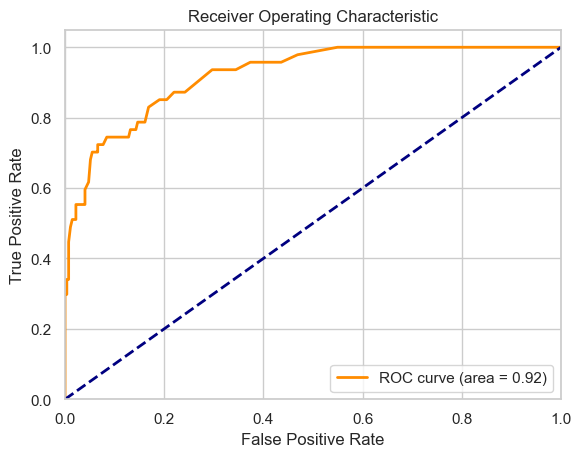

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score (accuracy): 0.9042889390519188
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       273
           1       0.55      0.68      0.61        47

    accuracy                           0.87       320
   macro avg       0.75      0.79      0.77       320
weighted avg       0.89      0.87      0.88       320

Accuracy: 0.871875


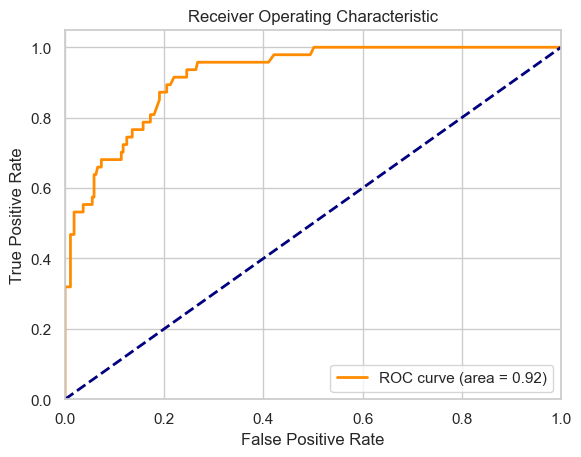

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation score (accuracy): 0.9382333801069691
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       273
           1       0.61      0.72      0.66        47

    accuracy                           0.89       320
   macro avg       0.78      0.82      0.80       320
weighted avg       0.90      0.89      0.89       320

Accuracy: 0.890625


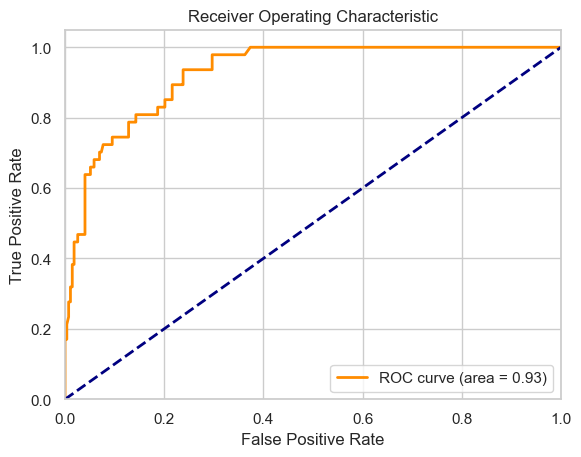

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc

def randomforest_model(X_train, y_train, X_test, y_test):
    """
    使用网格搜索训练 RandomForestClassifier，并在测试集上评估其性能。
    参数:
    - X_train: 训练集特征
    - y_train: 训练集标签
    - X_test: 测试集特征
    - y_test: 测试集标签
    
    返回:
    - best_model: 训练好的最佳模型
    - performance: 包含模型在测试集上的分类报告和准确率的字典
    """
    # 定义要搜索的参数网格
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
    }

    # 创建 RandomForestClassifier 实例
    rf = RandomForestClassifier(random_state=42)

    # 设置网格搜索
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                               cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

    # 执行网格搜索
    grid_search.fit(X_train, y_train)

    # 使用最佳参数的模型
    best_model = grid_search.best_estimator_

    # 使用最佳模型对测试集进行预测
    y_pred = best_model.predict(X_test)

    # 计算分类报告和准确率
    classification_report_result = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # 打印结果
    print(f'Best parameters found: {grid_search.best_params_}')
    print(f'Best cross-validation score (accuracy): {grid_search.best_score_}')
    print(classification_report_result)
    print(f'Accuracy: {accuracy}')

    y_pred_prob = best_model.predict_proba(X_test)[:, 1]

    # 计算 ROC 曲线的数据点
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    # 计算 AUC
    roc_auc = auc(fpr, tpr)
    
    # 绘制 ROC 曲线
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return best_model, y_pred_prob

# 假设 X_train_adasyn, y_train_adasyn, X_test, y_test 已准备好
rf_model, rf_pred_prod = randomforest_model(X_train, y_train, X_test, y_test)
rf_model_adasyn, rf_pred_prod = randomforest_model(X_train_adasyn, y_train_adasyn, X_test, y_test)
rf_model_smote, rf_pred_prod = randomforest_model(X_train_smote, y_train_smote, X_test, y_test)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score (accuracy): 0.8811458333333334
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       273
           1       0.46      0.26      0.33        47

    accuracy                           0.85       320
   macro avg       0.67      0.60      0.62       320
weighted avg       0.82      0.85      0.83       320

Accuracy: 0.846875


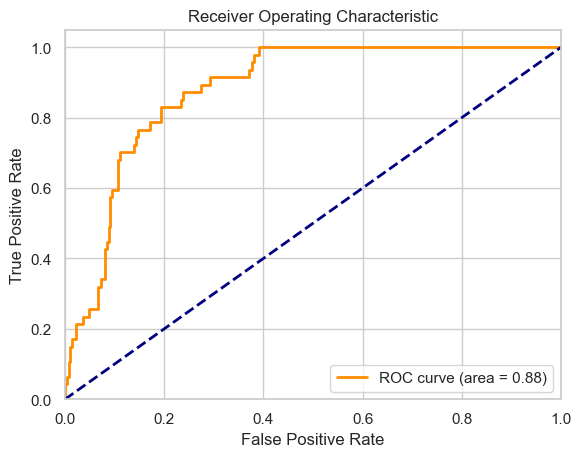

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score (accuracy): 0.7408577878103838
              precision    recall  f1-score   support

           0       0.96      0.76      0.85       273
           1       0.37      0.83      0.51        47

    accuracy                           0.77       320
   macro avg       0.67      0.79      0.68       320
weighted avg       0.88      0.77      0.80       320

Accuracy: 0.76875


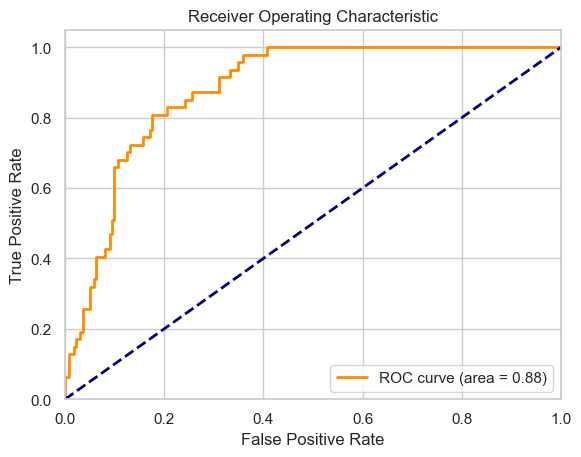

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score (accuracy): 0.7768307811197201
              precision    recall  f1-score   support

           0       0.96      0.79      0.87       273
           1       0.40      0.83      0.54        47

    accuracy                           0.79       320
   macro avg       0.68      0.81      0.70       320
weighted avg       0.88      0.79      0.82       320

Accuracy: 0.79375


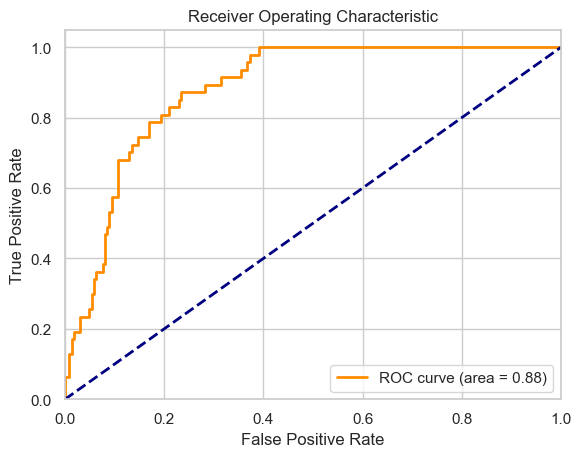

In [36]:
from sklearn.linear_model import LogisticRegression

def logisticregression_model(X_train, y_train, X_test, y_test):

    # 定义要搜索的参数网格
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],  # 正则化强度的倒数
        'penalty': ['l1', 'l2'],  # 正则化项
        'solver': ['liblinear']  # 对于 l1 惩罚，'liblinear' 是一个好的选择
    }

    # 创建一个带有类权重调整的逻辑回归模型
    lr_clf = LogisticRegression(max_iter=10000, random_state=42)

    # 设置网格搜索
    grid_search = GridSearchCV(estimator=lr_clf, param_grid=param_grid,
                               cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

    # 执行网格搜索
    grid_search.fit(X_train, y_train)

    # 使用最佳参数的模型
    best_model = grid_search.best_estimator_

    # 使用最佳模型对测试集进行预测
    y_pred = best_model.predict(X_test)

    # 计算分类报告和准确率
    classification_report_result = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # 打印结果
    print(f'Best parameters found: {grid_search.best_params_}')
    print(f'Best cross-validation score (accuracy): {grid_search.best_score_}')
    print(classification_report_result)
    print(f'Accuracy: {accuracy}')

    y_pred_prob = best_model.predict_proba(X_test)[:, 1]

    # 计算 ROC 曲线的数据点
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # 计算 AUC
    roc_auc = auc(fpr, tpr)

    # 绘制 ROC 曲线
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return best_model, y_pred_prob

lr_model, lr_pred_prod = logisticregression_model(X_train, y_train, X_test, y_test)
lr_mdoel_adasyn, lr_pred_prod = logisticregression_model(X_train_adasyn, y_train_adasyn, X_test, y_test)
lr_model_smote, lr_pred_prod = logisticregression_model(X_train_smote, y_train_smote, X_test, y_test)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters found: {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}
Best cross-validation score (accuracy): 0.8795833333333334
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       273
           1       0.60      0.26      0.36        47

    accuracy                           0.87       320
   macro avg       0.74      0.61      0.64       320
weighted avg       0.84      0.87      0.84       320

Accuracy: 0.865625


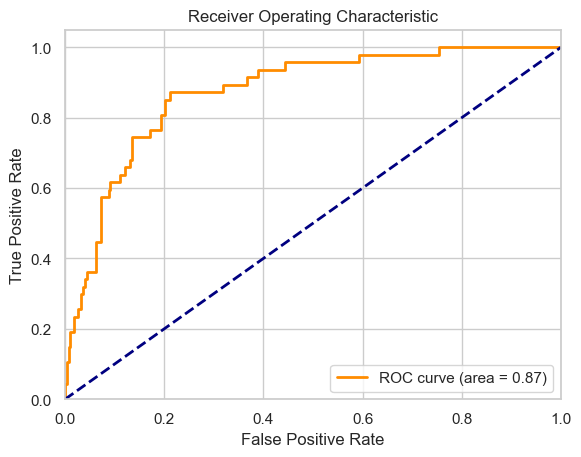

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters found: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best cross-validation score (accuracy): 0.8930022573363431
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       273
           1       0.48      0.70      0.57        47

    accuracy                           0.84       320
   macro avg       0.71      0.79      0.74       320
weighted avg       0.88      0.84      0.86       320

Accuracy: 0.84375


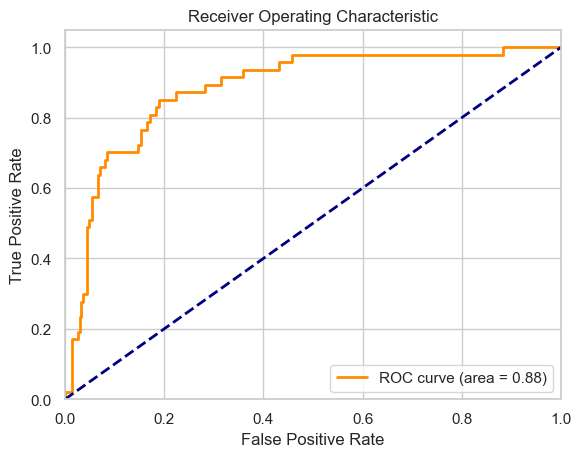

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END 

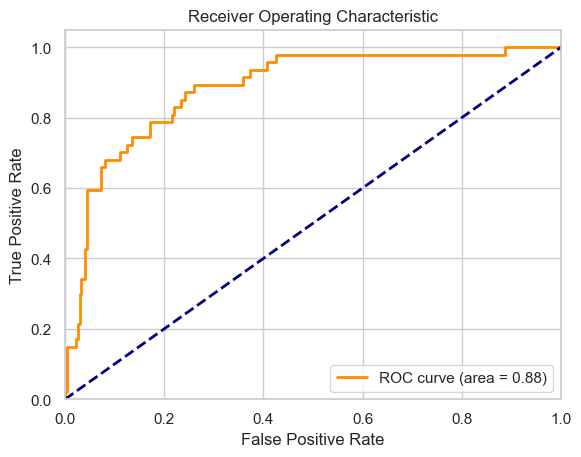

In [37]:
from sklearn.svm import SVC
def svm_model_train(X_train, y_train, X_test, y_test):

    # 定义要搜索的参数网格
    param_grid = {
        'C': [0.1, 1, 10],  # 正则化强度
        'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],  # 核函数类型
        'gamma': ['scale', 'auto'],  # 核系数
    }

    # 初始化 SVM 模型
    svm_clf = SVC(probability=True, random_state=42)

    grid_search = GridSearchCV(svm_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

    # 执行网格搜索
    grid_search.fit(X_train, y_train)

    # 使用最佳参数的模型
    best_model = grid_search.best_estimator_

    # 使用最佳模型对测试集进行预测
    y_pred = best_model.predict(X_test)

    # 计算分类报告和准确率
    classification_report_result = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # 打印结果
    print(f'Best parameters found: {grid_search.best_params_}')
    print(f'Best cross-validation score (accuracy): {grid_search.best_score_}')
    print(classification_report_result)
    print(f'Accuracy: {accuracy}')
    y_pred_prob = best_model.predict_proba(X_test)[:, 1]

    # 计算 ROC 曲线的数据点
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # 计算 AUC
    roc_auc = auc(fpr, tpr)

    # 绘制 ROC 曲线
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return best_model, y_pred_prob

svm_model, svm_pred_prob = svm_model_train(X_train, y_train, X_test, y_test)
svm_model_adasyn, svm_pred_prob = svm_model_train(X_train_adasyn, y_train_adasyn, X_test, y_test)
svm_model_smote, svm_pred_prob = svm_model_train(X_train_smote, y_train_smote, X_test, y_test)

#### ANN 深度學習

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping


# 确保目标变量是分类格式
y_train_cat = to_categorical(y_train_smote)
y_test_cat = to_categorical(y_test)

# 定义模型结构
model = Sequential()
model.add(Dense(10, input_dim=X_train_smote.shape[1], activation='relu', kernel_regularizer=l2(0.01))) # 输入层
model.add(Dense(6, activation='relu', kernel_regularizer=l2(0.01))) # 隐藏层
model.add(Dense(2, activation='softmax')) # 输出层，使用 softmax 因为是二分类问题

# 编译模型
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 训练模型
# history = model.fit(X_train_smote, y_train_cat, validation_split=0.2, epochs=15, batch_size=10, verbose=1)

# 初始化早期停止回调
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# 训练模型，并添加早期停止回调
history = model.fit(X_train_smote, y_train_cat,
                    validation_split=0.2,
                    epochs=30,
                    batch_size=10,
                    verbose=1,
                    callbacks=[early_stopping])

# 使用模型对测试集进行预测
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1) # 将输出概率转换为类别标签

# 计算分类报告和准确率
print(classification_report(y_test, y_pred_classes))
print(f'Accuracy: {accuracy_score(y_test, y_pred_classes)}')

Epoch 1/30


2024-03-31 21:00:09.698477: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


178/178 [==============================] - 0s 897us/step - loss: 0.7652 - accuracy: 0.5975 - val_loss: 0.9937 - val_accuracy: 0.0473
Epoch 2/30
178/178 [==============================] - 0s 444us/step - loss: 0.6584 - accuracy: 0.6607 - val_loss: 0.9043 - val_accuracy: 0.4212
Epoch 3/30
178/178 [==============================] - 0s 422us/step - loss: 0.5896 - accuracy: 0.7570 - val_loss: 0.7896 - val_accuracy: 0.6644
Epoch 4/30
178/178 [==============================] - 0s 424us/step - loss: 0.5455 - accuracy: 0.7880 - val_loss: 0.7311 - val_accuracy: 0.7500
Epoch 5/30
178/178 [==============================] - 0s 415us/step - loss: 0.5164 - accuracy: 0.7943 - val_loss: 0.6119 - val_accuracy: 0.7995
Epoch 6/30
178/178 [==============================] - 0s 408us/step - loss: 0.4980 - accuracy: 0.7903 - val_loss: 0.6100 - val_accuracy: 0.7860
Epoch 7/30
178/178 [==============================] - 0s 446us/step - loss: 0.4842 - accuracy: 0.7954 - val_loss: 0.5892 - val_accuracy: 0.7860
Epo

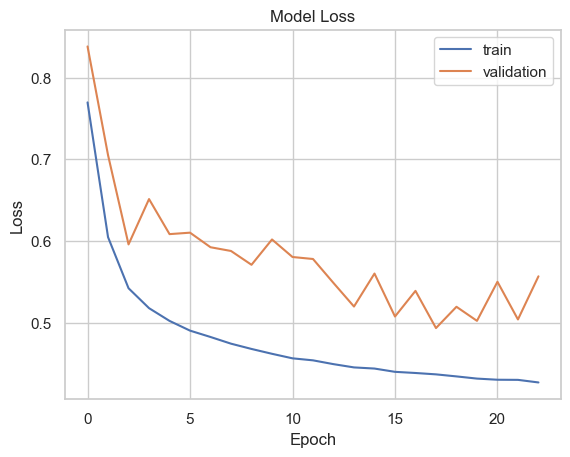

In [339]:
# 绘制训练损失和验证损失|
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

Epoch 1/30
103/103 [==============================] - 0s 1ms/step - loss: 0.6245 - accuracy: 0.8622 - val_loss: 0.5063 - val_accuracy: 0.8867
Epoch 2/30
103/103 [==============================] - 0s 481us/step - loss: 0.5044 - accuracy: 0.8622 - val_loss: 0.4361 - val_accuracy: 0.8867
Epoch 3/30
103/103 [==============================] - 0s 470us/step - loss: 0.4577 - accuracy: 0.8622 - val_loss: 0.4052 - val_accuracy: 0.8867
Epoch 4/30
103/103 [==============================] - 0s 468us/step - loss: 0.4302 - accuracy: 0.8622 - val_loss: 0.3835 - val_accuracy: 0.8867
Epoch 5/30
103/103 [==============================] - 0s 447us/step - loss: 0.4107 - accuracy: 0.8622 - val_loss: 0.3670 - val_accuracy: 0.8867
Epoch 6/30
103/103 [==============================] - 0s 482us/step - loss: 0.3953 - accuracy: 0.8612 - val_loss: 0.3551 - val_accuracy: 0.8867
Epoch 7/30
103/103 [==============================] - 0s 452us/step - loss: 0.3828 - accuracy: 0.8680 - val_loss: 0.3428 - val_accuracy: 0

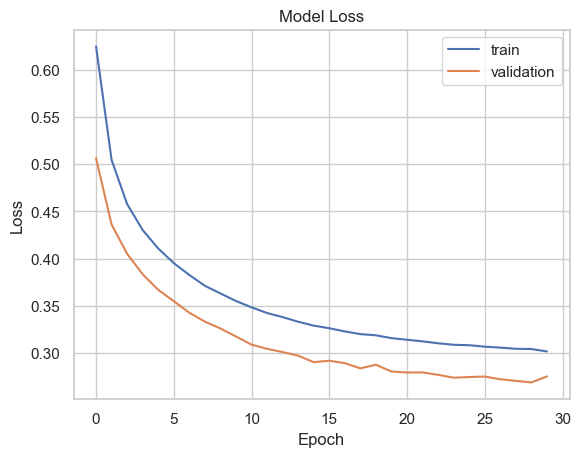

Epoch 1/30
178/178 [==============================] - 0s 947us/step - loss: 0.8060 - accuracy: 0.6213 - val_loss: 0.8773 - val_accuracy: 0.3002
Epoch 2/30
178/178 [==============================] - 0s 577us/step - loss: 0.6891 - accuracy: 0.7229 - val_loss: 0.8097 - val_accuracy: 0.5056
Epoch 3/30
178/178 [==============================] - 0s 454us/step - loss: 0.5946 - accuracy: 0.7511 - val_loss: 0.7445 - val_accuracy: 0.6501
Epoch 4/30
178/178 [==============================] - 0s 424us/step - loss: 0.5625 - accuracy: 0.7585 - val_loss: 0.7657 - val_accuracy: 0.6433
Epoch 5/30
178/178 [==============================] - 0s 409us/step - loss: 0.5471 - accuracy: 0.7675 - val_loss: 0.6925 - val_accuracy: 0.6998
Epoch 6/30
178/178 [==============================] - 0s 421us/step - loss: 0.5349 - accuracy: 0.7692 - val_loss: 0.6868 - val_accuracy: 0.7314
Epoch 7/30
178/178 [==============================] - 0s 407us/step - loss: 0.5253 - accuracy: 0.7703 - val_loss: 0.6545 - val_accuracy:

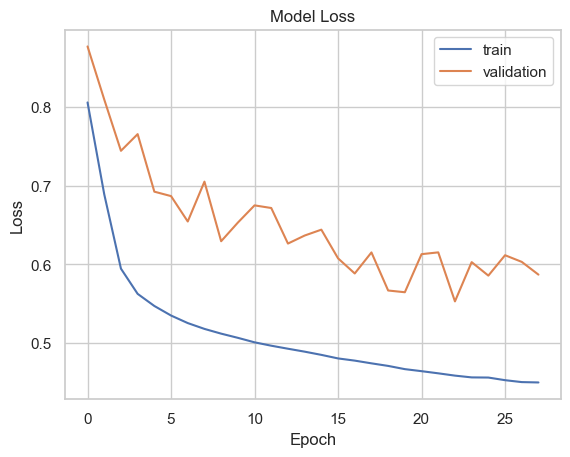

Epoch 1/30
178/178 [==============================] - 0s 749us/step - loss: 0.7471 - accuracy: 0.7041 - val_loss: 0.7679 - val_accuracy: 0.7387
Epoch 2/30
178/178 [==============================] - 0s 442us/step - loss: 0.6303 - accuracy: 0.7818 - val_loss: 0.6789 - val_accuracy: 0.7793
Epoch 3/30
178/178 [==============================] - 0s 431us/step - loss: 0.5842 - accuracy: 0.7807 - val_loss: 0.6669 - val_accuracy: 0.7770
Epoch 4/30
178/178 [==============================] - 0s 414us/step - loss: 0.5555 - accuracy: 0.7869 - val_loss: 0.6331 - val_accuracy: 0.7838
Epoch 5/30
178/178 [==============================] - 0s 402us/step - loss: 0.5353 - accuracy: 0.7937 - val_loss: 0.6128 - val_accuracy: 0.7838
Epoch 6/30
178/178 [==============================] - 0s 420us/step - loss: 0.5187 - accuracy: 0.7959 - val_loss: 0.6420 - val_accuracy: 0.7680
Epoch 7/30
178/178 [==============================] - 0s 420us/step - loss: 0.5070 - accuracy: 0.7982 - val_loss: 0.5985 - val_accuracy:

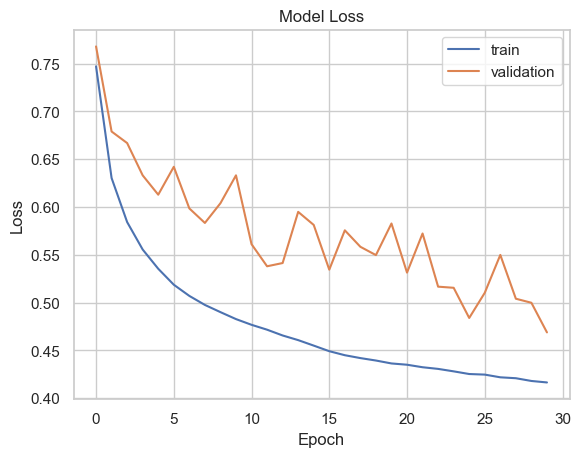

In [39]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score

def ANN_model_train(X_train, y_train, X_test, y_test):
    # 确保目标变量是分类格式
    y_train_cat = to_categorical(y_train)
    y_test_cat = to_categorical(y_test)

    # 定义模型结构
    model = Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01))) # 输入层
    model.add(Dense(6, activation='relu', kernel_regularizer=l2(0.01))) # 隐藏层
    model.add(Dense(y_train_cat.shape[1], activation='softmax')) # 输出层

    # 编译模型
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # 初始化早期停止回调
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

    # 训练模型，并添加早期停止回调
    history = model.fit(X_train, y_train_cat,
                        validation_split=0.2,
                        epochs=30,
                        batch_size=10,
                        verbose=1,
                        callbacks=[early_stopping])

    # 使用模型对测试集进行预测
    y_pred = model.predict(X_test)
    y_pred_classes = y_pred.argmax(axis=1) # 将输出概率转换为类别标签

    # 计算分类报告和准确率
    classification_report_result = classification_report(y_test, y_pred_classes)
    accuracy = accuracy_score(y_test, y_pred_classes)

    # 打印结果
    print(f'Best parameters found: {model.optimizer.get_config()}')
    print(classification_report_result)
    print(f'Accuracy: {accuracy}')

    # 绘制训练损失和验证损失|
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    plt.show()
    

    return model

# 假设 X_train_smote, y_train_smote, X_test, y_test 都已经准备好
ANN_model = ANN_model_train(X_train, y_train, X_test, y_test)
ANN_model_adasyn = ANN_model_train(X_train_adasyn, y_train_adasyn, X_test, y_test)
ANN_model_smote = ANN_model_train(X_train_smote, y_train_smote, X_test, y_test)

In [40]:
def perform_cross_validation(X, y):
    # 将标签转换为分类格式
    y_cat = to_categorical(y)

    # 定义 K 折交叉验证
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # 交叉验证分数
    cv_scores = []

    for train_index, test_index in kfold.split(X, y.argmax(axis=1)):  # 注意这里的变化，使用 y.argmax(axis=1) 来获取类别标签
        # 分割数据集
        X_train_fold, X_test_fold = X[train_index], X[test_index]
        y_train_fold, y_test_fold = y_cat[train_index], y_cat[test_index]
        

        # 创建并编译模型
        # ... 您原有的模型创建和编译代码 ...

        # 训练模型
        model.fit(X_train_fold, y_train_fold, epochs=30, batch_size=10, verbose=0)

        # 评估模型
        scores = model.evaluate(X_test_fold, y_test_fold, verbose=0)
        cv_scores.append(scores[1] * 100)

    # 输出交叉验证平均分数
    print(f'{kfold.n_splits}-fold cross-validation average accuracy: {np.mean(cv_scores)}%')

In [41]:
import xgboost as xgb
# 转换数据为DMatrix格式，XGBoost 的优化数据结构
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# XGBoost 参数
param_grid = {
    'max_depth': [3, 6, 10],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# 初始化 XGBoost 分类器
xgb_clf = xgb.XGBClassifier(eval_metric='logloss')

# 设置网格搜索
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=0)

# 执行网格搜索
grid_search.fit(X_train, y_train)

# 输出最佳参数
print(f'Best parameters found: {grid_search.best_params_}')
print(f'Best cross-validation score (accuracy): {grid_search.best_score_}')

# 使用最佳参数的模型进行预测
best_xgb_clf = grid_search.best_estimator_
y_pred = best_xgb_clf.predict(X_test)

# 计算并输出分类报告和准确率
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_es

KeyboardInterrupt: 

Best parameters found: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.9}
Best cross-validation score (accuracy): 0.905389093137255
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       273
           1       0.76      0.40      0.53        47

    accuracy                           0.89       320
   macro avg       0.83      0.69      0.73       320
weighted avg       0.88      0.89      0.88       320

Accuracy: 0.89375


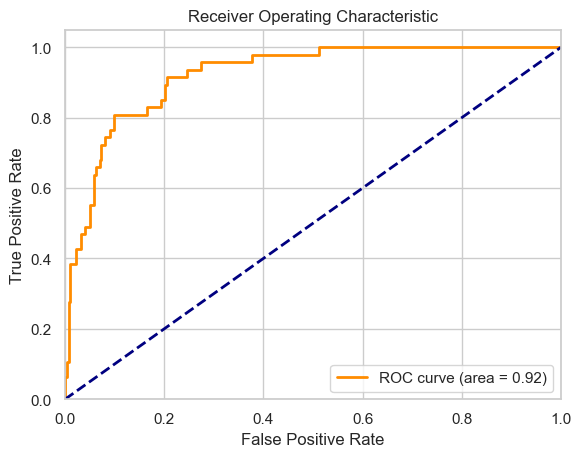

[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=   0.1s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=auto, kernel=poly; total time=   0.0s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END ......................C=1, gamma=scale, kernel=poly; total time=   0.1s
[CV] END ....................C=1, gamma=auto, kernel=sigmoid; total time=   0.1s
[CV] END ....................C=1, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ....................C=10, gamma=auto, kernel=linear; total time=   0.1s
[CV] END ...................C=10, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END ...................

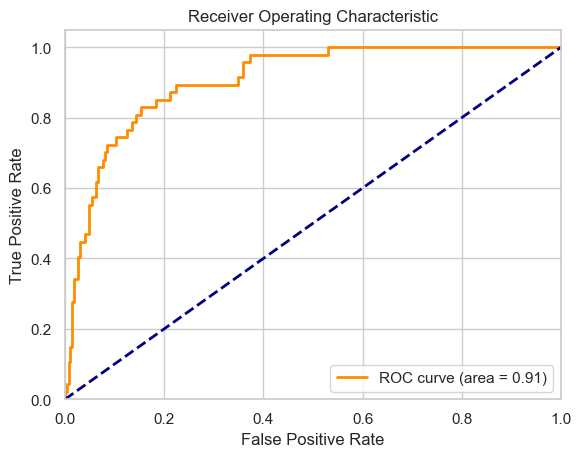

Best parameters found: {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.8}
Best cross-validation score (accuracy): 0.9373365464787586
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       273
           1       0.57      0.77      0.65        47

    accuracy                           0.88       320
   macro avg       0.76      0.83      0.79       320
weighted avg       0.90      0.88      0.89       320

Accuracy: 0.88125


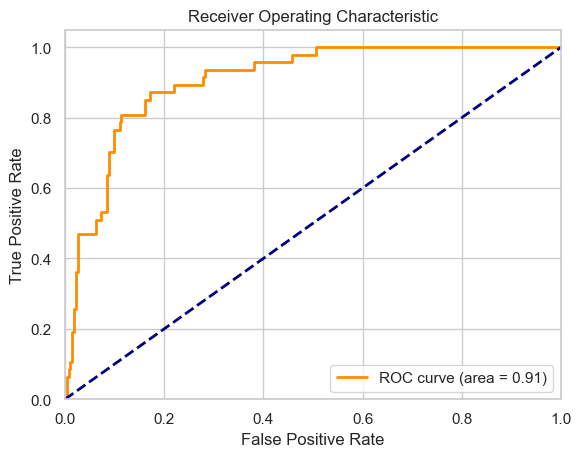

In [44]:
def xgb_grid_search(X_train, y_train, X_test, y_test, param_grid, cv_folds):
    """
    Perform grid search with cross-validation for XGBoost.

    :param X_train: Training feature dataset
    :param y_train: Training target dataset
    :param X_test: Testing feature dataset
    :param y_test: Testing target dataset
    :param param_grid: Dictionary with parameters names (str) as keys and lists of parameter settings to try as values
    :param cv_folds: int, cross-validation generator or an iterable, determines the cross-validation splitting strategy
    :return: A tuple of the best estimator from the grid search and the predictions for X_test
    """

    param_grid = {
        'max_depth': [3, 6, 10],
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.7, 0.8, 0.9],
        'colsample_bytree': [0.7, 0.8, 0.9]
    }

    # Initialize the XGBoost classifier
    xgb_clf = xgb.XGBClassifier(eval_metric='logloss')

    # Set up the grid search with cross-validation
    grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, scoring='accuracy', cv=cv_folds, verbose=0)

    # Perform grid search
    grid_search.fit(X_train, y_train)

    # Best parameters and CV score
    print(f'Best parameters found: {grid_search.best_params_}')
    print(f'Best cross-validation score (accuracy): {grid_search.best_score_}')

    # Best estimator
    best_xgb_clf = grid_search.best_estimator_

    # Predict on test set
    y_pred = best_xgb_clf.predict(X_test)

    # Classification report and accuracy
    print(classification_report(y_test, y_pred))
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

    y_pred_prob = best_xgb_clf.predict_proba(X_test)[:, 1]

    # 计算 ROC 曲线的数据点
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # 计算 AUC
    roc_auc = auc(fpr, tpr)

    # 绘制 ROC 曲线
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return best_xgb_clf, y_pred_prob

# Assuming X_train, y_train, X_test, y_test are already defined
# Call the function with the prepared data and parameter grid
xgb_model, xgb_pred_pred = xgb_grid_search(X_train, y_train, X_test, y_test, param_grid, cv_folds=5)
xgb_model, xgb_pred_pred_adasyn = xgb_grid_search(X_train_adasyn, y_train_adasyn, X_test, y_test, param_grid, cv_folds=5)
xgb_model, xgb_pred_pred_smote = xgb_grid_search(X_train_smote, y_train_smote, X_test, y_test, param_grid, cv_folds=5)

将所有模型的 ROC 曲线绘制在同一张图上。

In [417]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, matthews_corrcoef
from scipy.interpolate import interp1d


def plot_multi_model_roc(y_test, model_pred_probs):
    plt.figure(figsize=(10, 8))
    for model_name, y_pred_prob in model_pred_probs.items():
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)
        gini = 2 * roc_auc - 1
        mcc = matthews_corrcoef(y_test, y_pred)
        plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f}, Gini = {gini:.2f}, MCC = {mcc:.2f})')
        
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters found: {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}
Best cross-validation score (accuracy): 0.8795833333333334
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       273
           1       0.60      0.26      0.36        47

    accuracy                           0.87       320
   macro avg       0.74      0.61      0.64       320
weighted avg       0.84      0.87      0.84       320

Accuracy: 0.865625


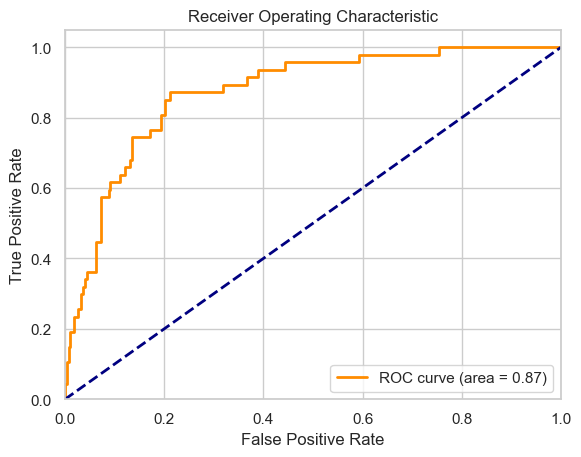

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters found: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best cross-validation score (accuracy): 0.8930022573363431
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       273
           1       0.48      0.70      0.57        47

    accuracy                           0.84       320
   macro avg       0.71      0.79      0.74       320
weighted avg       0.88      0.84      0.86       320

Accuracy: 0.84375


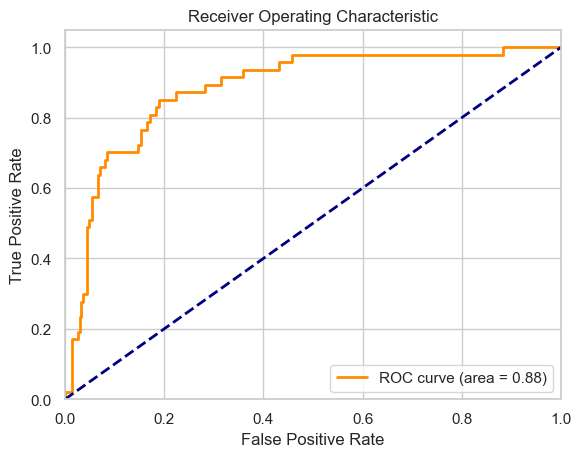

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters found: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best cross-validation score (accuracy): 0.9183911902873529
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       273
           1       0.54      0.68      0.60        47

    accuracy                           0.87       320
   macro avg       0.74      0.79      0.76       320
weighted avg       0.88      0.87      0.87       320

Accuracy: 0.86875


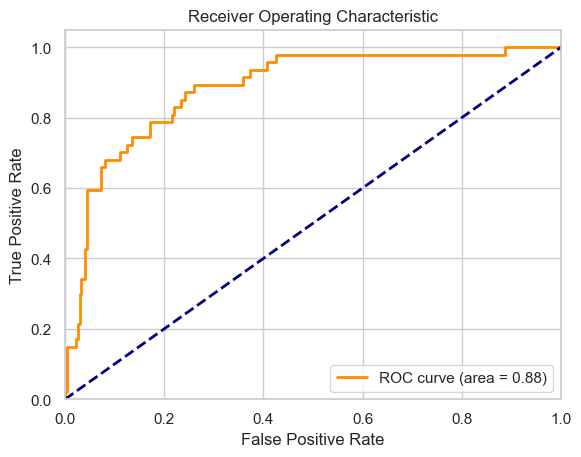

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score (accuracy): 0.8811458333333334
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       273
           1       0.46      0.26      0.33        47

    accuracy                           0.85       320
   macro avg       0.67      0.60      0.62       320
weighted avg       0.82      0.85      0.83       320

Accuracy: 0.846875


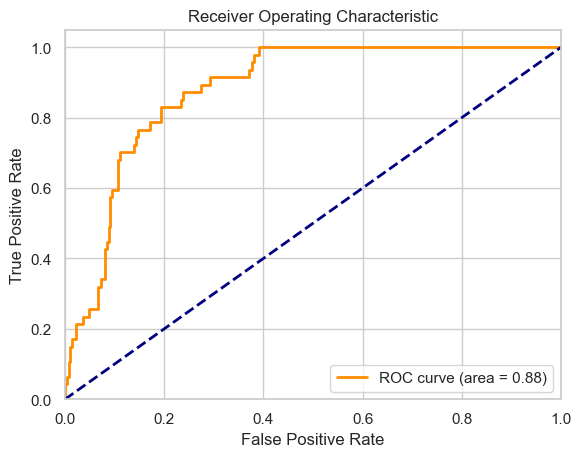

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score (accuracy): 0.7408577878103838
              precision    recall  f1-score   support

           0       0.96      0.76      0.85       273
           1       0.37      0.83      0.51        47

    accuracy                           0.77       320
   macro avg       0.67      0.79      0.68       320
weighted avg       0.88      0.77      0.80       320

Accuracy: 0.76875


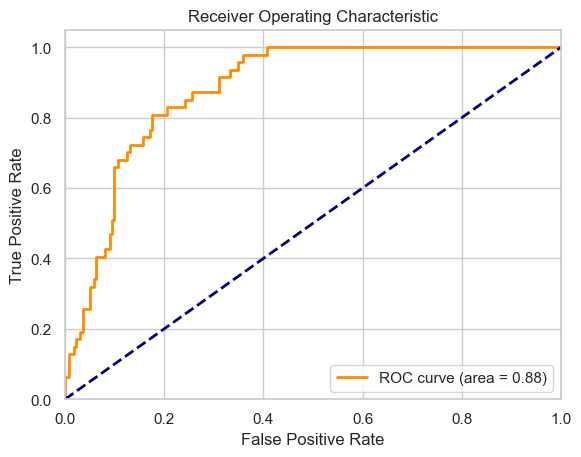

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score (accuracy): 0.7768307811197201
              precision    recall  f1-score   support

           0       0.96      0.79      0.87       273
           1       0.40      0.83      0.54        47

    accuracy                           0.79       320
   macro avg       0.68      0.81      0.70       320
weighted avg       0.88      0.79      0.82       320

Accuracy: 0.79375


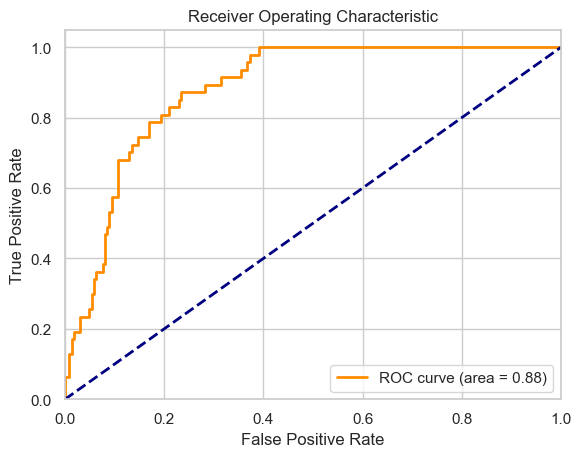

NameError: name 'xgb_pred_pred' is not defined

In [43]:
# 训练模型并获取预测概率
svm_model, svm_pred_prob = svm_model_train(X_train, y_train, X_test, y_test)
svm_model_adasyn, svm_pred_prob_adasyn = svm_model_train(X_train_adasyn, y_train_adasyn, X_test, y_test)
svm_model_smote, svm_pred_prob_smote = svm_model_train(X_train_smote, y_train_smote, X_test, y_test)
lg_model, lg_pred_prob = logisticregression_model(X_train, y_train, X_test, y_test)
lg_model_adasyn, lg_pred_prob_adasyn = logisticregression_model(X_train_adasyn, y_train_adasyn, X_test, y_test)
lg_model_smote, lg_pred_prob_smote = logisticregression_model(X_train_smote, y_train_smote, X_test, y_test)
xgb_model, xgb_pred_pred = xgb_grid_search(X_train, y_train, X_test, y_test, param_grid, cv_folds=5)

# 创建包含所有预测概率的字典
model_pred_probs = {
    "SVM": svm_pred_prob,
    "SVM_ADASYN": svm_pred_prob_adasyn,
    "SVM_SMOTE": svm_pred_prob_smote,
    'LogisticRegression': lg_pred_prob,
    'LogisticRegression_ADASYN': lg_pred_prob_adasyn,
    'LogisticRegression_SMOTE': lg_pred_prob_smote,
    'xgb': xgb_pred_pred
}

# 使用绘图函数绘制所有模型的ROC曲线
plot_multi_model_roc(y_test, model_pred_probs)